# The WASP 43b 

## Learning Goals:

This notebook will present the data for WASP 43b as observed by TESS. Data presented here will complement those derived from the JWST early release science. 

The notebook will teach the user how to do the following:

1. Search TESS for data on the WASP-43 system using *Lightkurve*.
2. Download a light curve.
3.  Find the transiting planet via a box least squares periodogram.
4. Bin the folded light curve to highlight additional information about the system.

To learn more about the TESS mission in general and the various data products please visit the [TESS Science Support Center](https://heasarc.gsfc.nasa.gov/docs/tess/).

## Introduction: 
The WASP 43 system is located approximately 280 light-years from the Earth in the constellation Sextans. It has an K-type host star which is roughly 60% the mass of our Sun.

The host star is home to WASP-43 b, a gas giant which is about 80% more massive than Jupiter, but about the same size.
The planet has an orbital period of about 0.8 days and as such it is a dense hot Jupiter. 

Given its short orbital period, less than 20 hours, JWST scientists are very interested in studying this object. By looking at different wavelengths of light, JWST scientists can sample the atmosphere to different depths and obtain a more complete picture of the planet structure. Studies by the Hubble and Spitzer telescopes have already indicated dramatic and unexpected variations for this planet. With JWST scientists aim to reveal these variations in significantly greater detail to understand the physical processes that are responsible.

For this tutorial we will look at the transit of the planet in addition to to the out of transit variations that are caused by the planet being very warm.

## Imports

This tutorial requires the [*Lightkurve package*](https://docs.lightkurve.org/index.html), [Matplotlib](https://matplotlib.org/) which we use for plotting, [Numpy](https://numpy.org/), and also [Astropy](https://www.astropy.org/) which we use for the units package.

In [1]:
%matplotlib inline 
import lightkurve as lk 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import astropy.units as u
import numpy as np

## First time users: 

If you are not that experienced with Python, or cannot download *Lightkurve*, you can run this notebook as a [Google Colab notebook](https://colab.research.google.com/?utm_source=scs-index). Colaboratory allows users to write and execute Python in your browser with zero configuration required.

All you need is a Google account and to copy and paste in the following command at the top of your colab notebook:

`!pip install lightkurve --quiet`

This downloads the Lightkurve package.

## 1. Search TESS for data on the WASP-43 system using *Lightkurve*.

Lightkurve offers a user-friendly way to analyze time series data obtained by the TESS mission. You can search for the various WASP-43 data products using the following functions:

- To the system in a full frame image: [`search_tesscut()`](https://docs.lightkurve.org/reference/api/lightkurve.search_tesscut.html?highlight=search_tesscut)
- To look for target pixel files: [`search_targetpixelfile()`](https://docs.lightkurve.org/reference/api/lightkurve.search_targetpixelfile.html?highlight=search_targetpixelfile)
- To obtain light curve files for WASP-96: [`search_lightcurve()`](https://docs.lightkurve.org/reference/api/lightkurve.search_lightcurve.html?highlight=search_lightcurve)


### 1.1 Accessing the data products
Let’s go through each one of the above functions and see what data is available.

In [2]:
search_ffi = lk.search_tesscut('WASP43')
search_tpf = lk.search_targetpixelfile('WASP43')
search_lcf = lk.search_lightcurve('WASP43')

In [3]:
search_ffi

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 09,2019,TESScut,1426,WASP43,0.0
1,TESS Sector 35,2021,TESScut,475,WASP43,0.0


The above table provides several important pieces of information: 

- The sector in which the object was observed. 
- The year in which the object was observed. 
- The author of the data. This can have multiple options and each is a hyperlink that when clicked will provide you with more information. 
- The cadence of the observation. 
- The name of the target. 
- The distance of the observation from your target of interest. This is useful if you conduct a cone search around your objects co-ordinates.

The table indicates that our object was observed in sectors 9 and 35.

Let’s see if any other data exists, i.e., was it observed as a target of interest and does it have a Target Pixel File.

In [4]:
search_tpf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 09,2019,SPOC,120,36734222,0.0
1,TESS Sector 09,2019,TESS-SPOC,1800,36734222,0.0
2,TESS Sector 35,2021,SPOC,20,36734222,0.0
3,TESS Sector 35,2021,SPOC,120,36734222,0.0
4,TESS Sector 35,2021,TESS-SPOC,600,36734222,0.0


Our object was observed as a target of interest and has several cadences of data, and several kinds of data products i.e, SPOC or TESS-SPOC. Given that there is SPOC data this means that there should be light curve files for our object already in the archive. Let’s check those out.

In [5]:
search_lcf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector,2019,DIAMANTE,1800,36734222,0.0
1,TESS Sector 09,2019,SPOC,120,36734222,0.0
2,TESS Sector 09,2019,TESS-SPOC,1800,36734222,0.0
3,TESS Sector 09,2019,QLP,1800,36734222,0.0
4,TESS Sector 35,2021,SPOC,20,36734222,0.0
5,TESS Sector 35,2021,SPOC,120,36734222,0.0
6,TESS Sector 35,2021,TESS-SPOC,600,36734222,0.0
7,TESS Sector 35,2021,QLP,600,36734222,0.0


Wonderful! Light curves for our object of interest have already been created.

## 2. Download a light curve:
We will now obtain the light curve for our object of interest. From the above table, it looks like there are multiple authors for our target. For the purpose of this tutorial, let’s stick to “SPOC” data products. We can return only these results using the following commands.

In [6]:
search_lcf_refined = lk.search_lightcurve('WASP43', author="SPOC")
search_lcf_refined

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 09,2019,SPOC,120,36734222,0.0
1,TESS Sector 35,2021,SPOC,20,36734222,0.0
2,TESS Sector 35,2021,SPOC,120,36734222,0.0


There are three light curves from four sectors: 9 and 35. Sector 35 has both 20-second and 120-second cadence light curves. For this tutorial we will look at sector 9 and the sector 35 20-second cadenced data. This will allow us to examine not only the transit but also the phase. 

In [7]:
lk_s9 = search_lcf_refined[0].download(quality_bitmask='hard')
lk_s35f = search_lcf_refined[1].download(quality_bitmask='hard')

We can easliy plot these data using the following code;

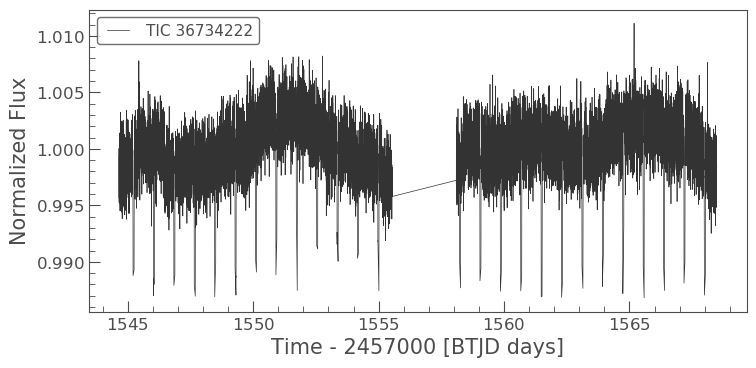

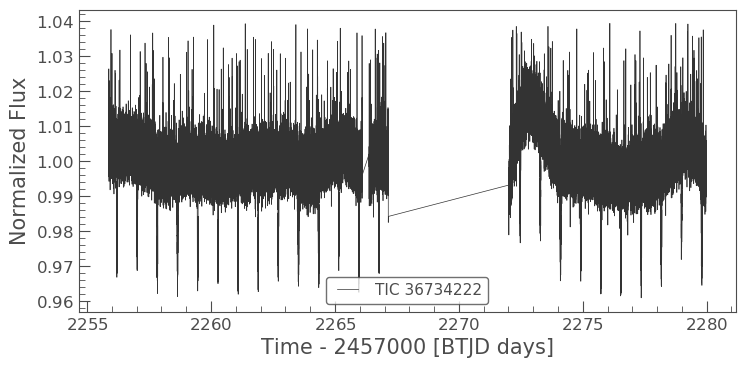

In [8]:
lk_s9.normalize().remove_outliers().plot()
lk_s35f.normalize().remove_outliers().plot()

Note that the [`normalize`](https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.normalize.html?highlight=normalize#lightkurve.LightCurve.normalize) and [`remove_outliers`](https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.remove_outliers.html?highlight=remove_outliers) functions were used here to present a more refined light curve. The plots above present a very clear transit signal, and also show some sinusoidal like variation. 

We can use the data from either sector to find the transit information, so for now let's use the data from sector 35 which has the faster cadence.

## 3. Find the transiting planet via a box least squares periodogram analysis.

The most common method used to identify transiting exoplanets is the Box Least Squares (BLS) periodogram analysis. BLS works by modeling a transit using an upside-down top hat with four parameters: period, duration, depth, and reference time. (Please see the [Identifying transiting exoplanet signals in a light curve tutorial](https://docs.lightkurve.org/tutorials/3-science-examples/exoplanets-identifying-transiting-planet-signals.html) for more information on BLS and finding exoplanets with *Lightkurve*)

To analyze the light curve via the BLS method you must pass the data to the [`to_periodogram`](https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.to_periodogram.html?highlight=to_periodogram) function and specify `bls` as the method. 

We can also refine our periodogram based on the system parameters listed at the [NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/). The period listed for WASP-43b is ~0.8 days.

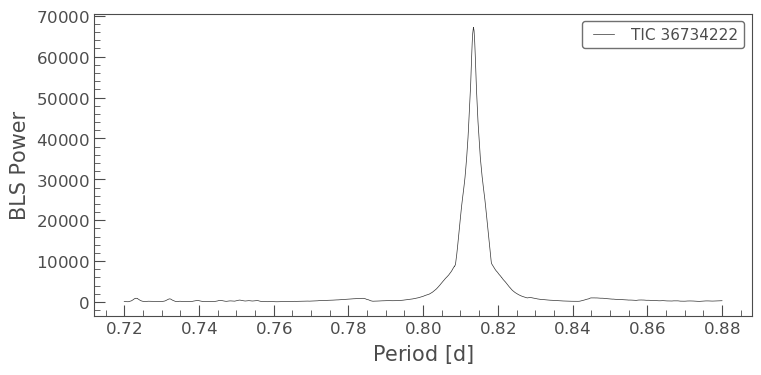

In [9]:
period0 = 0.8
bls_refined = lk_s35f.normalize().to_periodogram('bls', minimum_period=period0*0.90, maximum_period=period0*1.1, 
                                         duration=np.linspace(0.01, 0.1, 10), frequency_factor=1)
bls_refined.plot()

The above plot indicates the power, or the likelihood of the BLS fit, for each of the periods in lightcurve data. 
Since we roughly knew the period, we have just one power spike which shows the most likely period.

We can pull out the most likely BLS parameters by taking their values at maximum power as shown below.

In [10]:
WASP43_b_period = bls_refined.period_at_max_power.value
WASP43_b_t0 =  bls_refined.transit_time_at_max_power.value
WASP43_b_dur = bls_refined.duration_at_max_power.value

WASP43_b_period 

0.8134903713257401

We have now derived the period of the planet WASP-43b as 0.81 days, which is consistant with that published.

To confirm that this period and transit time (epoch) correspond to a transit signal, we can phase-fold the light curve using these values, normalize it, and plot it.

In [11]:
lkf = lk_s35f.fold(WASP43_b_period , WASP43_b_t0).normalize().remove_outliers()

(-10, 10)

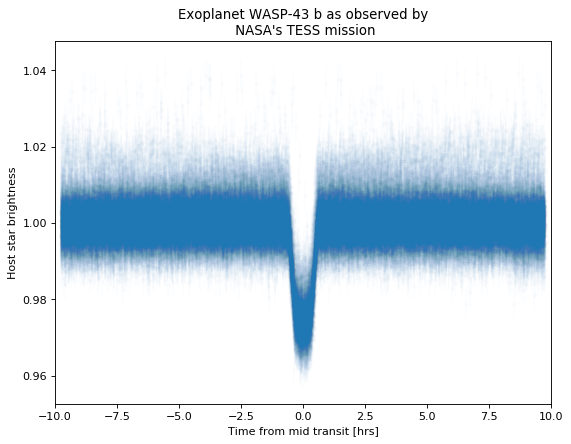

In [12]:
figure(figsize=(8, 6), dpi=80)
plt.errorbar(lkf.phase.value*24, lkf.flux.value, fmt=".", alpha=0.01, yerr=lkf.flux_err.value)
plt.title("Exoplanet WASP-43 b as observed by\n NASA's TESS mission")
plt.xlabel("Time from mid transit [hrs]")
plt.ylabel("Host star brightness")
plt.xlim(-10,10)